# 5. Whisper

- https://openai.com/blog/whisper/  
- trained on 680,000 hours of multilingual and multitask supervised data collected from the web.
- multiple languages (https://github.com/openai/whisper/blob/main/whisper/tokenizer.py)

<img src="https://cdn.openai.com/whisper/asr-summary-of-model-architecture-desktop.svg">

## Whisper install
https://github.com/openai/whisper

In [ ]:
# clone git repo (use pip)
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-ued4q5by
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-ued4q5by
  Resolved https://github.com/openai/whisper.git to commit b91c907694f96a3fb9da03d4bbdc83fbcd3a40a4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Whisper model load

In [ ]:
import whisper

# whisper model load large
model = whisper.load_model("large")

In [ ]:
# whisper model load tiny
tiny_model = whisper.load_model("tiny")

In [ ]:
# check parameters of tiny model
list(tiny_model.parameters())

[Parameter containing:
 tensor([[[-7.5645e-03, -7.5073e-03, -7.2098e-03],
          [ 2.4460e-02,  1.7090e-02,  1.2566e-02],
          [ 1.7639e-02,  1.3382e-02,  7.1297e-03],
          ...,
          [-4.5654e-02, -2.0615e-02, -1.8799e-02],
          [-5.6152e-02, -3.0167e-02, -2.2278e-02],
          [-9.1309e-02, -7.4463e-02, -6.0150e-02]],
 
         [[ 1.9836e-03,  4.9531e-05,  8.9417e-03],
          [ 3.6182e-03, -4.6921e-03,  7.0953e-03],
          [ 1.3229e-02,  2.4738e-03,  1.4656e-02],
          ...,
          [ 1.0986e-02,  1.0757e-02, -6.6795e-03],
          [ 7.4883e-03,  4.8370e-03, -1.3214e-02],
          [ 2.4628e-02,  2.2186e-02,  2.5005e-03]],
 
         [[ 2.1042e-02,  2.7985e-02,  3.2715e-02],
          [-6.1737e-02, -7.9346e-02, -9.3628e-02],
          [-2.3315e-02, -5.3467e-02, -5.6549e-02],
          ...,
          [-9.7942e-04, -8.1940e-03, -2.5139e-03],
          [ 2.8801e-03, -4.2114e-03, -3.9139e-03],
          [-9.0561e-03, -1.6479e-02, -7.9575e-03]],
 
     

- `datasets` : audio, computer vision, nlp task 용 공유 데이터에 쉽게 접근할 수 있는 라이브러리, huggingface에서 사용됨

In [ ]:
# install datasets
!pip install datasets

In [ ]:
from datasets import load_dataset

## LibriSpeech dataset

- approximately 1000 hours of 16kHz
- read audiobooks from the LibriVox project

https://www.openslr.org/12  
https://paperswithcode.com/dataset/librispeech  
https://huggingface.co/datasets/librispeech_asr

In [ ]:
# LibriSpeech dataset load -> too large
ds = load_dataset("librispeech_asr", 'clean')

In [ ]:
# LibriSpeech test data load
english_ds = load_dataset("kresnik/librispeech_asr_test", "clean")

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
english_ds

DatasetDict({
    test: Dataset({
        features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
        num_rows: 2620
    })
})

In [ ]:
# check file list
english_ds = english_ds['test']

In [ ]:
len(english_ds)

2620

In [ ]:
# check sample data
sample = english_ds[0]

In [ ]:
sample

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/c94eb421fb50cd9d1b68fa05e36adc06bf44c82dbf4bf576772bd123c9cf2781/LibriSpeech/test-clean/2094/142345/2094-142345-0000.flac',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/c94eb421fb50cd9d1b68fa05e36adc06bf44c82dbf4bf576772bd123c9cf2781/LibriSpeech/test-clean/2094/142345/2094-142345-0000.flac',
  'array': array([8.30078125e-03, 9.21630859e-03, 9.52148438e-03, ...,
         1.70898438e-03, 8.85009766e-04, 9.15527344e-05]),
  'sampling_rate': 16000},
 'text': 'IT IS A VERY FINE OLD PLACE OF RED BRICK SOFTENED BY A PALE POWDERY LICHEN WHICH HAS DISPERSED ITSELF WITH HAPPY IRREGULARITY SO AS TO BRING THE RED BRICK INTO TERMS OF FRIENDLY COMPANIONSHIP WITH THE LIMESTONE ORNAMENTS SURROUNDING THE THREE GABLES THE WINDOWS AND THE DOOR PLACE',
 'speaker_id': 2094,
 'chapter_id': 142345,
 'id': '2094-142345-0000'}

- `IPython.display` : IPython 위젯을 사용할 수 있는 라이브러리

In [ ]:
import IPython.display as ipd

In [ ]:
# listen audio file using ipd.Audio
ipd.Audio(sample['audio']['array'], rate=sample['audio']['sampling_rate'])

In [ ]:
# text
sample['text']

'IT IS A VERY FINE OLD PLACE OF RED BRICK SOFTENED BY A PALE POWDERY LICHEN WHICH HAS DISPERSED ITSELF WITH HAPPY IRREGULARITY SO AS TO BRING THE RED BRICK INTO TERMS OF FRIENDLY COMPANIONSHIP WITH THE LIMESTONE ORNAMENTS SURROUNDING THE THREE GABLES THE WINDOWS AND THE DOOR PLACE'

## Whisper model을 이용한 LibriSpeech 인식

In [ ]:
# transcribe using whisper model
result = model.transcribe(sample['file'])

In [ ]:
from pprint import pprint

In [ ]:
pprint(result)

{'language': 'en',
 'segments': [{'avg_logprob': -0.28299574170793806,
               'compression_ratio': 1.532258064516129,
               'end': 7.94,
               'id': 0,
               'no_speech_prob': 0.004382602870464325,
               'seek': 0,
               'start': 0.0,
               'temperature': 0.0,
               'text': ' It is a very fine old place of red brick, softened by '
                       'a pale, powdery liken, which has',
               'tokens': [50364,
                          467,
                          307,
                          257,
                          588,
                          2489,
                          1331,
                          1081,
                          295,
                          2182,
                          16725,
                          11,
                          2787,
                          5320,
                          538,
                          257,
                          19546,

In [ ]:
# check result
print("hypothesis: "+ result['text'])
print("reference: "+ sample['text'].lower())

hypothesis:  It is a very fine old place of red brick, softened by a pale, powdery liken, which has dispersed itself with happy irregularity. So as to bring the red brick into terms of friendly companionship with the limestone ornaments surrounding the three gables, the windows and the door place.
reference: it is a very fine old place of red brick softened by a pale powdery lichen which has dispersed itself with happy irregularity so as to bring the red brick into terms of friendly companionship with the limestone ornaments surrounding the three gables the windows and the door place


In [ ]:
# compare with reference

- `jiwer` : CER, WER 등 음성인식 결과 평가 관련 라이브러리

In [ ]:
! pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.0 MB/s eta 0:00:00


In [ ]:
from jiwer import cer, wer

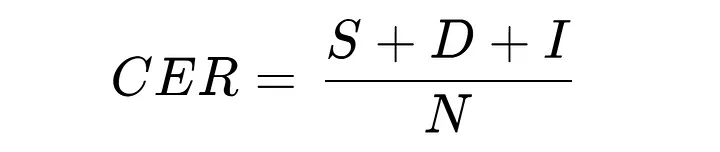

S = Number of Substitutions  
D = Number of Deletions  
I = Number of Insertions  
N = Number of characters in reference text (aka ground truth)

In [ ]:
# calculate cer
wer(sample['text'].lower(), result['text'].lower())

0.12244897959183673

## Zeroth-Korean

- 51.6시간 한국어 학습데이터 (22,263 발화, 105명, 3000 문장)  
- 휴대폰으로 녹음
- https://github.com/goodatlas/zeroth

In [ ]:
# Zeroth-Korean dataset load
korea_ds = load_dataset("kresnik/zeroth_korean", "clean")

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# check file list
korea_ds

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
        num_rows: 22263
    })
    test: Dataset({
        features: ['file', 'audio', 'text', 'speaker_id', 'chapter_id', 'id'],
        num_rows: 457
    })
})

In [ ]:
ko_test_ds = korea_ds['test']

In [ ]:
len(ko_test_ds)

457

In [ ]:
# check sample data
sample = ko_test_ds[0]
pprint(sample)

{'audio': {'array': array([ 0.        ,  0.        ,  0.        , ..., -0.00012207,
        0.00018311, -0.00012207]),
           'path': '/root/.cache/huggingface/datasets/downloads/extracted/3c93119fdbcba519e1529c416a7339ed19b67c18686fc5bea5eda3309e01e58e/test_data_01/003/118/118_003_0037.flac',
           'sampling_rate': 16000},
 'chapter_id': 3,
 'file': '/root/.cache/huggingface/datasets/downloads/extracted/3c93119fdbcba519e1529c416a7339ed19b67c18686fc5bea5eda3309e01e58e/test_data_01/003/118/118_003_0037.flac',
 'id': '118_003_0037',
 'speaker_id': 118,
 'text': '유열씨는 일본 국적자로 분류되면서 군대를 가지 않았다'}


In [ ]:
# listen audio file using ipd.Audio
ipd.Audio(sample['file'])

## whisper model을 이용한 Zeroth-Korean 인식

In [ ]:
# transcribe using whisper model
ko_result = model.transcribe(sample['file'], language='ko')

In [ ]:
# check result
pprint(ko_result['text'])

' 30분 정도면 될 것 같은데 이종원 회장의 장례식은 별세 시점은 14일 기준으로 일곱 일장으로 치러진다'


In [ ]:
# compare with reference
print("hypothesis: " + ko_result['text'])
print("reference: " + sample['text'])

hypothesis:  유열 씨는 일본 국적자로 분려되면서 군대를 가지 않았다.
reference: 유열씨는 일본 국적자로 분류되면서 군대를 가지 않았다


In [ ]:
# calculate cer
cer(sample['text'], ko_result['text'])

0.10344827586206896

In [ ]:
# remove special symbol

import re
# re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', text)

In [ ]:
predict = ko_result['text'].lstrip()
print(predict)
predict = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', predict)
print(predict)

유열 씨는 일본 국적자로 분려되면서 군대를 가지 않았다.
유열 씨는 일본 국적자로 분려되면서 군대를 가지 않았다


In [ ]:
print("hypothesis: " + predict)
print("reference: " + sample['text'])

hypothesis: 유열 씨는 일본 국적자로 분려되면서 군대를 가지 않았다
reference: 유열씨는 일본 국적자로 분류되면서 군대를 가지 않았다


jiwer 모듈의 깃허브
https://github.com/jitsi/jiwer.git

In [ ]:
!git clone https://github.com/jitsi/jiwer.git

Cloning into 'jiwer'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 611 (delta 100), reused 89 (delta 65), pack-reused 443
Receiving objects: 100% (611/611), 791.79 KiB | 7.84 MiB/s, done.
Resolving deltas: 100% (287/287), done.


In [ ]:
import jiwer.measures as ms
cer_result = ms.cer(sample['text'], predict, return_dict=True)
print("S:", cer_result['substitutions'])
print("D:", cer_result['deletions'])
print("I:", cer_result['insertions'])
print("N:", len(sample['text']))
print("CER", 2/29)

S: 1
D: 0
I: 1
N: 29
CER 0.06896551724137931


In [ ]:
# calculate cer
cer(sample['text'], predict)

0.06896551724137931

In [ ]:
# whisper load_audio
# whisper pad_or_trim

audio = whisper.load_audio(sample['file'])
audio.shape

(93132,)

In [ ]:
audio = whisper.pad_or_trim(audio)
audio.shape

(480000,)

In [ ]:
480000/16000

30.0

In [ ]:
93132/16000

5.82075

In [ ]:
# whisper log_mel_spectrogram
mel = whisper.log_mel_spectrogram(audio).to(model.device)

In [ ]:
mel

tensor([[-0.8032, -0.7884, -0.8313,  ..., -1.0162, -1.0162, -1.0162],
        [-1.0162, -0.9486, -1.0125,  ..., -1.0162, -1.0162, -1.0162],
        [-1.0162, -0.9946, -1.0104,  ..., -1.0162, -1.0162, -1.0162],
        ...,
        [-1.0162, -1.0162, -1.0162,  ..., -1.0162, -1.0162, -1.0162],
        [-1.0162, -1.0162, -1.0162,  ..., -1.0162, -1.0162, -1.0162],
        [-1.0162, -1.0162, -1.0162,  ..., -1.0162, -1.0162, -1.0162]],
       device='cuda:0')

In [ ]:
mel.shape

torch.Size([80, 3000])

- `matplotlib` : 시각화용 라이브러리

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
mel_cpu = mel.cpu()

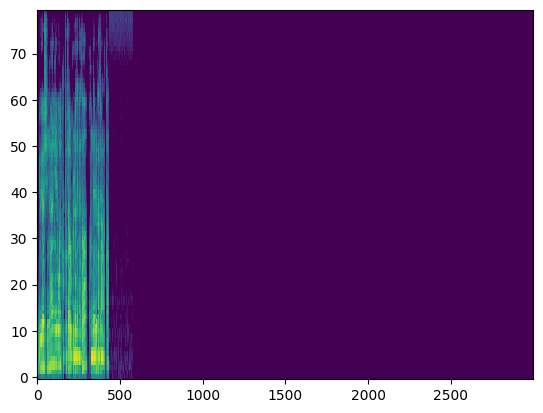

In [ ]:
plt.imshow(mel_cpu, aspect='auto', interpolation='nearest', origin='lower')

In [ ]:
# whisper decode
# options = whisper.DecodingOptions(fp16 = False)
result = whisper.decode(model, mel)

In [ ]:
sample['text'].lower()

'유열씨는 일본 국적자로 분류되면서 군대를 가지 않았다'

In [ ]:
pprint(result)

DecodingResult(audio_features=tensor([[-4.8755e-01, -5.3027e-01, -1.6113e-01,  ..., -4.3750e+00,
          4.2358e-02, -1.7517e-01],
        [-6.9873e-01,  8.2458e-02, -4.5441e-02,  ..., -3.0918e+00,
          5.7080e-01, -3.4375e-01],
        [ 5.1318e-01,  9.3066e-01,  1.9055e-01,  ..., -4.3242e+00,
          3.8501e-01,  5.9326e-02],
        ...,
        [-2.4376e-03,  2.9445e-04, -8.9111e-03,  ...,  1.1848e-02,
         -1.4740e-02,  1.4734e-03],
        [-4.6425e-03,  3.1109e-03, -1.1040e-02,  ...,  1.2131e-02,
         -1.3916e-02,  1.0700e-03],
        [-8.5983e-03,  5.3215e-03, -8.6594e-03,  ...,  7.6065e-03,
         -2.4967e-03, -4.1733e-03]], device='cuda:0', dtype=torch.float16),
               language='ko',
               language_probs=None,
               tokens=[50364,
                       11878,
                       37628,
                       17394,
                       1098,
                       38496,
                       13858,
                       7

In [ ]:
whisper_result = model.transcribe(sample['file'], language='ko')

In [ ]:
pprint(whisper_result)

{'language': 'ko',
 'segments': [{'avg_logprob': -0.37886329491933185,
               'compression_ratio': 0.875,
               'end': 4.6000000000000005,
               'id': 0,
               'no_speech_prob': 0.001312478445470333,
               'seek': 0,
               'start': 0.0,
               'temperature': 0.0,
               'text': ' 유열 씨는 일본 국적자로 분려되면서 군대를 가지 않았다.',
               'tokens': [50364,
                          11878,
                          37628,
                          17394,
                          1098,
                          38496,
                          13858,
                          7554,
                          11945,
                          1955,
                          21735,
                          19479,
                          238,
                          1894,
                          9332,
                          4946,
                          2004,
                          49946,
                          26569

In [ ]:
cer(sample['text'], predict)

0.06896551724137931

## 실시간으로 녹음 후 Whisper Model로 인식 결과 확인
Gradio를 이용해 간단한 Web UI를 구현해 본인의 목소리를 실시간으로 녹음하고  
whisper model로 녹음한 음성 인식 결과 확인  
https://github.com/innovatorved/whisper-openai-gradio-implementation

In [ ]:
! pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.0 MB/s eta 0:00:00
   

In [ ]:
import gradio as gr
import time

In [ ]:
def SpeechToText(audio):
    if audio == None : return ""
    time.sleep(1)

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    # make log-Mel spectrogram and move to the same device as the model
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # Detect the Max probability of language
    _, probs = model.detect_language(mel)
    language = max(probs, key=probs.get)

    #  Decode audio to Text
    options = whisper.DecodingOptions(fp16 = False)
    result = whisper.decode(model, mel)
    return (language , result.text)

In [ ]:
??gr.Interface

In [ ]:
gr.Interface(
    title = 'OpenAI Whisper implementation on Gradio Web UI',
    fn=SpeechToText,

    inputs=[
        gr.Audio(source="microphone", type="filepath")
    ],
    outputs=[
        "label",
        "textbox",
    ],
    live=True
).launch(
    debug=False,
    share=True
)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://da339d88a16e18aa1d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
